# Major and trace elements
[<!-- module-htg badge --><span class="module module-htg">High-Temperature Geochemistry</span>](module-htg) 
```{index} Major element
```
```{index} Trace element
```
Whether an element is called a major or a trace element depends on its concentration in the reservoir, rock or mineral under consideration.

The major elements determine which specific minerals form when a magma crystallizes.

Trace elements are normally present only in low concentrations (<$0.1\%$) in common rocks and minerals. Trace elements can substitute for major elements in minerals but they are not themselves essential structural constituents.

Especially in the older geochemical literature, trace element abundances are often quoted in units $ppm$ or $ppb$ – parts per million or parts per billion in weight units:

   * $1\,ppm = 1\,\mu g/g\,(mg/kg)$ ($1\,\mu g$ of the element in $1\,g$ of rock)
   * $1\,ppb = 1\,ng/g\,(\mu g/kg)$ ($1\,ng$ of the element in $1\,g$ of rock)
   
Use of the parts-per notation is not SI conform and hence no longer encouraged (and not accepted by some journals).
```{index} Minor element
```
In most silicate rocks $O$, $Si$, $Al$, $Na$, $Mg$, $Ca$, and $Fe$ are the major elements. $H$, $C$, $S$, $K$, $P$, $Ti$, $Cr$, and $Mn$ are “sometimes” major elements in silicates as they are stoichiometric constituents of some mineral phases. These elements are therefore sometimes called minor elements. A similar/alternative definition states that minor elements are present at concentrations of $0.1\%$ to $1\%$ in rocks.

The element $K$ (potassium) does not form its own minerals in midocean ridge basalts (MORB) or mantle peridotites. $K$ is therefore a trace element in the ocean crust and the mantle. $K$ is not a trace but a major element in granites and the continental crust, where it forms K-feldspars.

Some elements form their own minerals under unusual circumstances but are normally trace elements. For example, $Sr$ (strontium) forms the minerals celestite ($SrSO_4$) and strontianite ($SrCO_3$) – $Sr$ is a major element in these minerals. But these minerals are very unusual and they can thus be neglected when we discuss the major processes that govern the distribution of $Sr$ in the Earth and its reservoirs. Therefore, $Sr$ is generally classified as a trace element. The important issue is that major elements govern the mineralogy of a rock and trace elements substitute into these phases.

In [8]:
# import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from math import log10, floor

In [9]:
# create our own functions

# function to round a value to a certain number of significant figures
def round_to_n_sf(value, no_of_significant_figures):
    value_rounded = round(value, no_of_significant_figures-1-int(floor(log10(abs(value)))))
    if value_rounded == int(value_rounded): 
        value_rounded = int(value_rounded)
    return value_rounded

# function for calculating elemental abundance in a sample
# valid input unit allows milli, micro, and nano prefixes
def elemental_abundance_calculator(mass_element, unit_mass_element, mass_sample, unit_mass_sample, abundance_unit):
    # remove space
    unit_mass_element = unit_mass_element.replace(' ', '')
    unit_mass_sample = unit_mass_sample.replace(' ', '')
    abundance_unit = abundance_unit.replace(' ', '')
    
    # check if the desired unit of abundance is the same as unit_mass_element/unit_mass_sample
    if unit_mass_element+'/'+unit_mass_sample == abundance_unit:
        return mass_element / mass_sample
    # If not, ...
    else: 
        # check if there is a prefix of mass units. If yes, convert the value into gram.
        if unit_mass_element.find('m') != -1: mass_element *= 10**-3
        elif unit_mass_element.find('µ') != -1: mass_element *= 10**-6
        elif unit_mass_element.find('n') != -1: mass_element *= 10**-9
        if unit_mass_sample.find('m') != -1: mass_sample *= 10**-3
        elif unit_mass_sample.find('µ') != -1: mass_sample *= 10**-6
        elif unit_mass_sample.find('n') != -1: mass_sample *= 10**-9
        
        # check if there is a prefix of abundance unit. If yes, convert the value.
        slash_index = abundance_unit.find('/')
        if abundance_unit[:slash_index].find('m') != -1: mass_element *= 10**3
        elif abundance_unit[:slash_index].find('µ') != -1: mass_element *= 10**6
        elif abundance_unit[:slash_index].find('n') != -1: mass_element *= 10**9
        if abundance_unit[slash_index:].find('m') != -1: mass_sample *= 10**3
        elif abundance_unit[slash_index:].find('µ') != -1: mass_sample *= 10**6
        elif abundance_unit[slash_index:].find('n') != -1: mass_sample *= 10**9
        
        return mass_element / mass_sample
    


## Problem Set 1 - Question 1

An analyst dissolved $112\,mg$ of a granite sample, $187\,mg$ of a basalt sample, and $833\,mg$ of a dunite. Once dissolved, the solutions were diluted to $125\,ml$ and analyzed for their trace element contents by ICP-MS (inductively coupled plasma mass spectrometry – a common and precise method for trace element analyses of rocks). The measurements revealed $Rb$ concentrations of $191\,ng/ml$, $1.88\,ng/ml$, and $0.108\,ng/ml$ for the solutions of the granite, the basalt, and the dunite, respectively. Calculate the $Rb$ abundances of the granite and the basalt rock sample in units of $\mu g/g$. For the dunite, the $Rb$ content should be given in $ng/g$. 

<u>Solution</u>:

We need to find the mass of $Rb$ in each sample by multiplying the concentration of each solution ($ng/ml$) with its volume ($125\,ml$). Then, we can calculate the $Rb$ abundance by the mass of $Rb$ in a sample divided by the mass of that sample (be careful of units!). We will use the function called "elemental_abundance_calculator" for this question.

In [10]:
# Question 1 
abundance_unit_granite = "µg/g"
abundance_unit_basalt = "µg/g"
abundance_unit_dunite = "ng/g"
Rb_abundance_granite = elemental_abundance_calculator(191*125, "ng", 112, "mg", abundance_unit_granite)  # granite
Rb_abundance_basalt = elemental_abundance_calculator(1.88*125, "ng", 187, "mg", abundance_unit_basalt)  # basalt
Rb_abundance_dunite = elemental_abundance_calculator(0.108*125, "ng", 833, "mg", abundance_unit_dunite)  # dunite
# print answers
print("The Rb abundance of the granite sample is %g %s." % (round_to_n_sf(Rb_abundance_granite, 3), abundance_unit_granite))
print("The Rb abundance of the granite sample is %g %s." % (round_to_n_sf(Rb_abundance_basalt, 3), abundance_unit_basalt))
print("The Rb abundance of the granite sample is %g %s." % (round_to_n_sf(Rb_abundance_dunite, 3), abundance_unit_dunite))

The Rb abundance of the granite sample is 213 µg/g.
The Rb abundance of the granite sample is 1.26 µg/g.
The Rb abundance of the granite sample is 16.2 ng/g.


## Problem Set 1 - Question 3

Make a CI chondrite normalized rare earth element plot (like those shown in the lecture with a logarithmic y-axis; paper is supplied) for two ocean island basalts (OIBs) from Hawaii and Iceland, based on the concentration data (in $\mu g/g$) given in the Table below. Describe the main features of the plots and speculate on their origin.

In [12]:
# creating a DataFrame to show the elemental abundances of lanthanide elements in two basalts and CI carbonaceous chondrites
elements = ["La", "Ce", "Pr", "Nd", "Sm", "Eu", "Gd", "Tb", "Dy", "Ho", "Er", "Tm", "Yb", "Lu"]
abundances_in_BHVO1 = np.array([15.8, 39, 5.7, 25.2, 6.2, 2.06, 6.4, 0.96, 5.2, 0.99, 2.4, 0.33, 2.02, 0.291])  # µg/g
abundances_in_BIR1 = np.array([0.62, 1.95, 0.38, 2.5, 1.1, 0.54, 1.85, 0.36, 2.5, 0.57, 1.7, 0.26, 1.65, 0.26])  # µg/g
abundances_in_CI = np.array([0.237, 0.613, 0.0928, 0.457, 0.148, 0.0563, 0.199, 0.0361, 0.246, 0.0546, 0.160, 0.0247, 0.161, 0.0246])  # µg/g

dict1 = {'' : elements,
        'Abundances in Hawaiian Basalt BHVO-1' : abundances_in_BHVO1,
        'Abundances in Iceland Basalt BIR-1' : abundances_in_BIR1,
        'Abundances in CI Carbonaceous Chondrites' : abundances_in_CI}
df1 = pd.DataFrame(dict1)
df1.loc[:, 'Abundances in Hawaiian Basalt BHVO-1'] = df1['Abundances in Hawaiian Basalt BHVO-1'].map('{:g}'.format)
df1.loc[:, 'Abundances in Iceland Basalt BIR-1'] = df1['Abundances in Iceland Basalt BIR-1'].map('{:g}'.format)
df1.loc[:, 'Abundances in CI Carbonaceous Chondrites'] = df1['Abundances in CI Carbonaceous Chondrites'].map('{:g}'.format)
display(df1.style.hide_index())

,Abundances in Hawaiian Basalt BHVO-1,Abundances in Iceland Basalt BIR-1,Abundances in CI Carbonaceous Chondrites
La,15.8,0.62,0.237
Ce,39,1.95,0.613
Pr,5.7,0.38,0.0928
Nd,25.2,2.5,0.457
Sm,6.2,1.1,0.148
Eu,2.06,0.54,0.0563
Gd,6.4,1.85,0.199
Tb,0.96,0.36,0.0361
Dy,5.2,2.5,0.246
Ho,0.99,0.57,0.0546


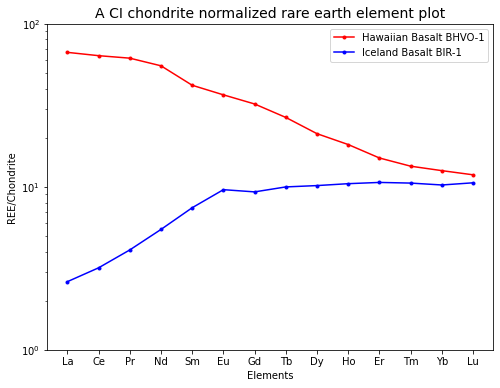

In [13]:
# normalize elemental abundances by those of CI carbonaceous chondrites
normalised_abundances_in_BHVO1 = abundances_in_BHVO1/abundances_in_CI
normalised_abundances_in_BIR1 = abundances_in_BIR1/abundances_in_CI

# Make a CI chondrite normalized rare earth element plot
plt.figure(figsize=(8,6))
plt.plot(elements, normalised_abundances_in_BHVO1, 'r.-', label="Hawaiian Basalt BHVO-1")
plt.plot(elements, normalised_abundances_in_BIR1, 'b.-', label="Iceland Basalt BIR-1")
plt.xlabel('Elements')
plt.ylabel('REE/Chondrite')
plt.ylim([1, 100])
plt.yscale("log")
plt.title('A CI chondrite normalized rare earth element plot', fontsize=14)
plt.legend(loc='best', fontsize=10)

Leave this plot to students for discussion.

## References

- Lecture slide and Practical for Lecture 1 of the High-Temperature Geochemistry module